## Coach Lab Linear Regression

### Objectives
*Put together a linear regression model <br>
*Understand the steps in modeling<br>
*Evaluate linear regression model


![caption](images/Model_Process_Part1.png)
![caption](images/Model_Process_Part2.png)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### For this lesson we will use the computer hardware dataset from https://www.mldata.io/dataset-details/computer_hardware/

In [2]:
comp = pd.read_csv('data/computer_hardware_dataset.csv')

### Project Question Formulation


What do we want to evaluate/explore/answer????

In [3]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [5]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


### Step 1 Train/test Split
#### Target is PRP

In [6]:
# create y and X as the target and the features
y = comp['PRP']
X = comp.drop(columns=['PRP'])

In [7]:
#split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [8]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 9), (156,), (53, 9), (53,))

### Step 2- Exploratory Data Analysis 

We will use only the training data for this part

#### As a first step in data cleaning lets look for missing values

In [9]:
X_train.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
ERP            0
dtype: int64

In [10]:
#return uniques (value_counts) for vendor_name and model_name
len(X_train.vendor_name.unique())

29

In [11]:
len(X_train.model_name.unique())

156

In [12]:
def drop_columns(df, col_name):
    #dataframe without col_name
    df = df.drop(columns = [col_name])
    return df


In [13]:
X_train = drop_columns(X_train, 'model_name')

In [14]:
X_train.head()

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
29,c.r.d,320,256,5000,4,1,6,27
19,burroughs,110,5000,5000,142,8,64,124
135,magnuson,50,2000,16000,24,6,16,88
139,nas,115,2000,4000,2,1,5,29
66,hp,90,256,1000,0,3,10,18


#### Next let's look at the distribution of our variables

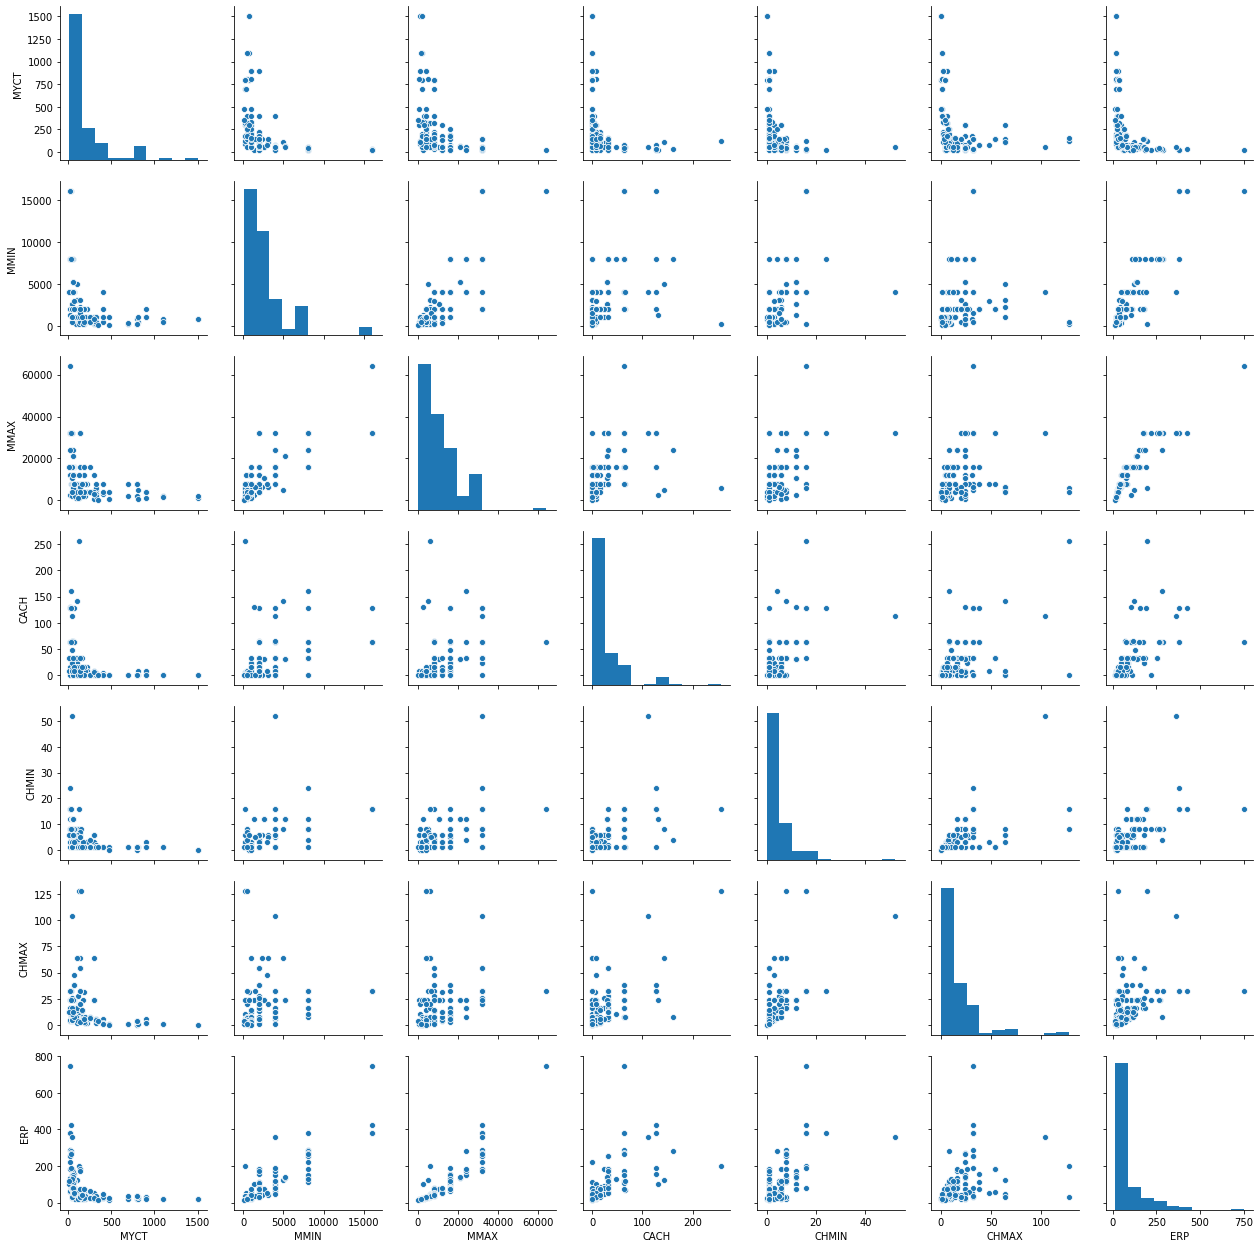

In [15]:
#create scatterplot matrix
sns.pairplot(X_train)

#### Next let's look at the distribution of our target

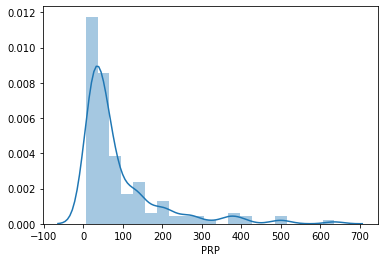

In [16]:
#histogram of y_train
sns.distplot(y_train)

#### Do we have any categorical variables we need to encode?

In [45]:
X_train_log = pd.concat([X_train.loc[:,'vendor_name'], X_train.loc[:,'CACH':'CHMAX'], X_train.loc[:, 'MYCT':'MMAX'].applymap(np.log).add_suffix('_log')], axis=1)

In [46]:
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,c.r.d,4,1,6,5.768321,5.545177,8.517193
19,burroughs,142,8,64,4.700480,8.517193,8.517193
135,magnuson,24,6,16,3.912023,7.600902,9.680344
139,nas,2,1,5,4.744932,7.600902,8.294050
66,hp,0,3,10,4.499810,5.545177,6.907755


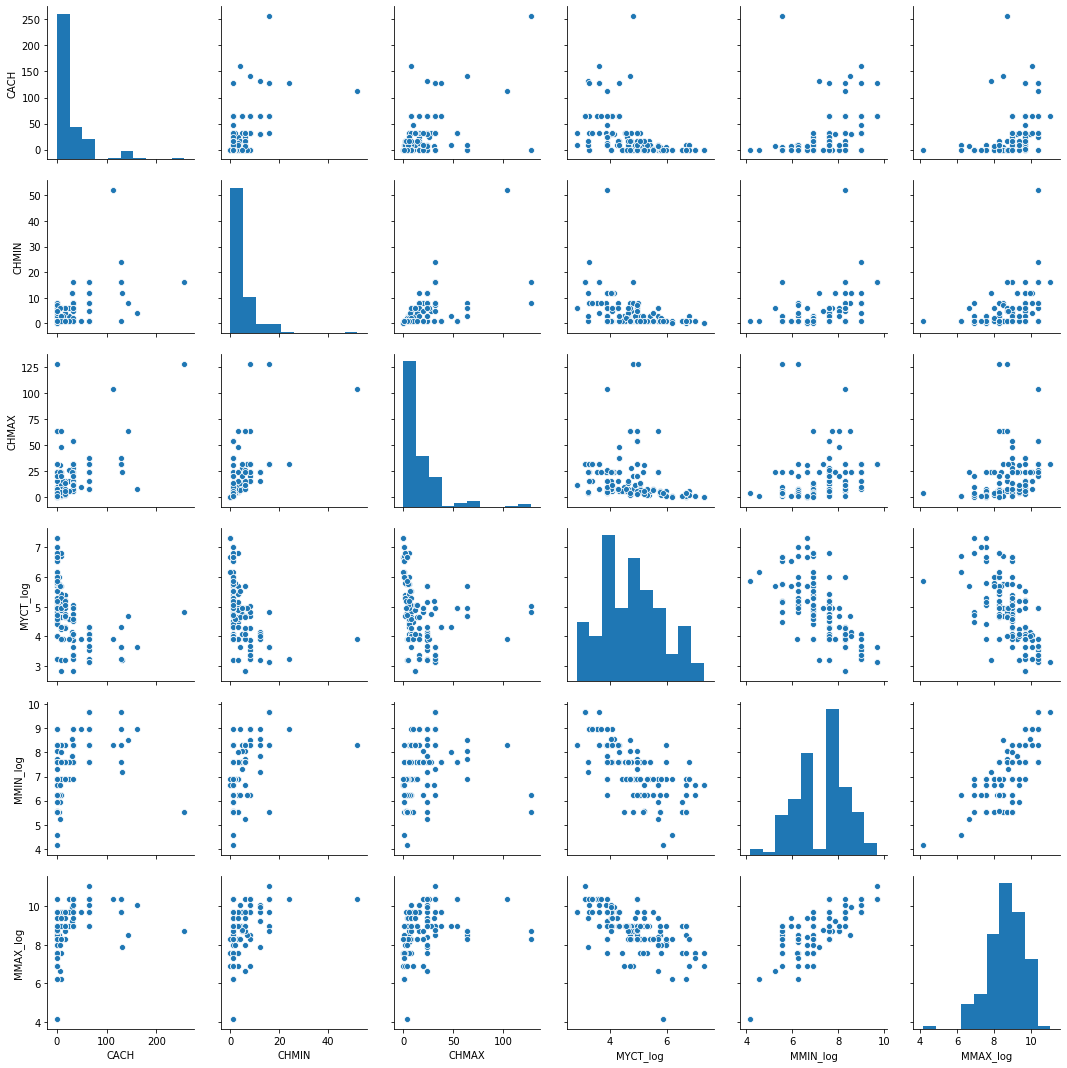

In [19]:
sns.pairplot(X_train_log)

In [20]:
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,c.r.d,4,1,6,5.768321,5.545177,8.517193
19,burroughs,142,8,64,4.700480,8.517193,8.517193
135,magnuson,24,6,16,3.912023,7.600902,9.680344
139,nas,2,1,5,4.744932,7.600902,8.294050
66,hp,0,3,10,4.499810,5.545177,6.907755


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
enc = OneHotEncoder()

In [47]:
vendor_matrix = enc.fit_transform(X_train_log.vendor_name.values.reshape(-1, 1)).toarray()

In [48]:
X_train_log = X_train_log.drop('vendor_name', axis = 1)

In [49]:
X_train_log.head()

,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,4,1,6,5.768321,5.545177,8.517193
19,142,8,64,4.700480,8.517193,8.517193
135,24,6,16,3.912023,7.600902,9.680344
139,2,1,5,4.744932,7.600902,8.294050
66,0,3,10,4.499810,5.545177,6.907755


In [50]:
X_train_log.reset_index(drop=True, inplace=True)

In [51]:
vendor_df = pd.DataFrame(vendor_matrix, columns=enc.categories_)

In [52]:
X_train_log = X_train_log.join(vendor_df)

In [53]:
X_train_log.head()

,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log,"(adviser,)","(amdahl,)","(apollo,)","(basf,)","(bti,)","(burroughs,)","(c.r.d,)","(cambex,)","(cdc,)","(dec,)","(dg,)","(formation,)","(four-phase,)","(gould,)","(harris,)","(honeywell,)","(hp,)","(ibm,)","(ipl,)","(magnuson,)","(microdata,)","(nas,)","(ncr,)","(nixdorf,)","(perkin-elmer,)","(prime,)","(siemens,)","(sperry,)","(wang,)"
0,4,1,6,5.768321,5.545177,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,142,8,64,4.700480,8.517193,8.517193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,6,16,3.912023,7.600902,9.680344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,5,4.744932,7.600902,8.294050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,10,4.499810,5.545177,6.907755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Next let's scale our data

Why do we do this?  What does it mean about the comparability of our variables?  What about interpretation of coefficients?

In [ ]:
#try to scale data and see how affects the results

### Step 4 - Messy Model

#### First let's use statsmodels

In [62]:
#Linear regression using statsmodels
results = sm.OLS(list(y_train), X_train_log).fit()

#### Now let's use sklearn

In [58]:
#initialize a linear regression model in sklearn
lr = LinearRegression()

In [59]:
#fit linear model to training data
lr.fit(X_train_log, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 5 - Model Evaluation

In [63]:
#get summary statistics from statsmodels
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           6.47e-30
Time:                        17:20:37   Log-Likelihood:                -818.27
No. Observations:                 156   AIC:                             1707.
Df Residuals:                     121   BIC:                             1813.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CACH                  1.0979      0.201      5.458      0.000       0.700       1.496
CHMIN                 5.7610      1.381      4.172      0.000       3.027       8.495
CHMAX                 0.1321      0.566      0.234      0.816      -0.988       1.252
MYCT_log             -9.8126      8.199     -1.197      0.234     -26.044       6.419
MMIN_log             11.7052     10.776      1.086      0.280      -9.629      33.040
MMAX_log             16.7350      9.293      1.801      0.074      -1.662      35.132
('adviser',)       -355.2759    114.893     -3.092      0.002    -582.738    -127.814
('amdahl',)         -44.4446    105.821     -0.420      0.675    -253.945     165.056
('apollo',)        -122.9081    109.888     -1.118      0.266    -340.461      94.645
('basf',)          -173.1297    106.800     -1.621      0.108    -384.568      38.309
('bti',)            -57.0870     92.345     -0.618      0.538    -239.908     125.734
('burroughs',)     -196.2477    101.567     -1.932      0.056    -397.327       4.831
('c.r.d',)         -120.2092    104.373     -1.152      0.252    -326.843      86.425
('cambex',)        -186.3575    100.862     -1.848      0.067    -386.041      13.326
('cdc',)           -176.9873     97.492     -1.815      0.072    -369.999      16.024
('dec',)           -132.2837    106.517     -1.242      0.217    -343.163      78.596
('dg',)            -129.8021    106.171     -1.223      0.224    -339.995      80.391
('formation',)     -139.0036    113.524     -1.224      0.223    -363.753      85.746
('four-phase',)    -153.9733    102.395     -1.504      0.135    -356.691      48.745
('gould',)         -126.8772    103.380     -1.227      0.222    -331.545      77.791
('harris',)        -131.5035    101.801     -1.292      0.199    -333.046      70.039
('honeywell',)     -145.0410    103.561     -1.401      0.164    -350.066      59.984
('hp',)            -153.0598     95.911     -1.596      0.113    -342.940      36.821
('ibm',)           -137.4565    105.112     -1.308      0.193    -345.553      70.640
('ipl',)           -163.4720    104.238     -1.568      0.119    -369.839      42.895
('magnuson',)      -200.6613    102.964     -1.949      0.054    -404.506       3.183
('microdata',)     -195.6522    115.270     -1.697      0.092    -423.859      32.555
('nas',)           -140.9507    104.173     -1.353      0.179    -347.189      65.288
('ncr',)           -200.5388     99.614     -2.013      0.046    -397.751      -3.326
('nixdorf',)       -137.0921    111.182     -1.233      0.220    -357.206      83.022
('perkin-elmer',)  -139.1765    107.360     -1.296      0.197    -351.723      73.370
('prime',)         -139.5322    101.407     -1.376      0.171    -340.294      61.229
('siemens',)       -173.6267    104.098     -1.668      0.098    -379.715

In [64]:
#get r squared value from sklearn
lr.score(X_train_log, y_train)

0.8115493337126586

In [65]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [67]:
X_train_log.shape

(156, 35)

In [68]:
#calculate adjusted r squared
adjusted_r_suared(lr.score(X_train_log, y_train), 156, 35)

0.7565845560455173

#### What does the r-squared value mean? What do the r-squared values tell us about the fit of our model?  What about adjusted r-squared?

#### Now let's look at predictions of relative performance to compare to actual relative performance

In [ ]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train), y_train).reset_index()

In [ ]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [ ]:
linreg_results_df.head()

## Let's use regularization to see if that helps our model fit

In [69]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

### Lasso Regularizer

In [70]:
#conduct lasso regression on training data
lasso = Lasso()

In [72]:
#Evaluation of lasso on training data
lasso.score(X_train_log, y_train)

0.7654813415723285

In [73]:
#examine coefficients from lasso
adjusted_r_suared(lasso.score(X_train_log, y_train), 156, 35)

0.697080066197591

### Ridge Regularizer

In [ ]:
#conduct ridge regression on training data

In [ ]:
#Evaluation of ridge on training data

In [ ]:
#examine coefficients from ridge

### Step 6 - Best Model Evaluation

In [ ]:
#apply data cleaning process to test set

In [ ]:
#run best model on test set

### Step 7 - Model Interpretation

What take-ways do we have?  Conclusions about our initial question?  Who would care?  Why do they care?